# Author: Jose Guzman


In [88]:
# Install the packages listed in requirements.txt
%pip install -r requirements.txt

# Data Importing

In [14]:
import pandas as pd

df = pd.read_csv('data/atp_tennis.csv')
print(df.head())


                           Tournament        Date         Series    Court  \
0  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
1  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
2  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
3  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
4  Australian Hardcourt Championships  2000-01-03  International  Outdoor   

  Surface      Round  Best of        Player_1       Player_2       Winner  \
0    Hard  1st Round        3      Dosedel S.    Ljubicic I.   Dosedel S.   
1    Hard  1st Round        3      Clement A.     Enqvist T.   Enqvist T.   
2    Hard  1st Round        3       Escude N.  Baccanello P.    Escude N.   
3    Hard  1st Round        3  Knippschild J.     Federer R.   Federer R.   
4    Hard  1st Round        3     Fromberg R.  Woodbridge T.  Fromberg R.   

   Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2        Score  
0      63    

In [15]:
# Display summary statistics of the dataset
df.describe(include='all')

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
count,63079,63079,63079,63079,63079,63079,63079.000000,63079,63079,63079,63079.000000,63079.000000,63079.00000,63079.000000,63079.000000,63079.000000,63079
unique,263,6096,8,2,4,8,NaN,1449,1446,1118,NaN,NaN,NaN,NaN,NaN,NaN,6844
top,French Open,2001-01-15,ATP250,Outdoor,Hard,1st Round,NaN,Federer R.,Federer R.,Federer R.,NaN,NaN,NaN,NaN,NaN,NaN,6-3 6-4
freq,3052,125,16473,51821,33918,28937,NaN,668,725,1151,NaN,NaN,NaN,NaN,NaN,NaN,1146
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.376322,NaN,NaN,NaN,75.874380,75.545792,1104.95699,1111.239636,2.174835,2.165586,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.781687,NaN,NaN,NaN,100.463901,101.198603,1709.53914,1736.369386,2.788854,2.747397,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,24.000000,24.000000,16.50000,18.500000,1.220000,1.220000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,53.000000,54.000000,680.00000,681.000000,1.660000,1.660000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,92.000000,92.000000,1215.00000,1220.000000,2.625000,2.620000,NaN


Define Function to Handle Missing Values 

In [16]:
def handle_missing_values(df):
    # Drop columns with more than 50% missing values
    df = df.dropna(thresh=len(df) * 0.5, axis=1)
    # Forward fill remaining missing values
    df = df.ffill()
    return df



String Manipulation

In [17]:
def split_player_name(df, player_column):
    names = df[player_column].str.split(' ', n=1, expand=True)
    last_name_col = f"{player_column}_Last_Name"
    first_initial_col = f"{player_column}_First_Initial"
    df[last_name_col] = names[0]
    df[first_initial_col] = names[1].str[0]
    df.drop(columns=[player_column], inplace=True)
    return df



Read the CSV File

In [18]:
def split_player_name(df, player_column):
    names = df[player_column].str.split(' ', n=1, expand=True)
    last_name_col = f"{player_column}_Last_Name"
    first_initial_col = f"{player_column}_First_Initial"
    df[last_name_col] = names[0]
    df[first_initial_col] = names[1].str[0]
    df.drop(columns=[player_column], inplace=True)
    return df


Handling Missing Values

In [19]:
df = handle_missing_values(df)


Split Player Names

In [20]:
if 'Player_1' in df.columns and 'Player_2' in df.columns:
    df = split_player_name(df, 'Player_1')
    df = split_player_name(df, 'Player_2')
else:
    print("Required columns 'Player_1' and 'Player_2' are not present in the DataFrame.")


Convert Data Column to Datatime

In [21]:
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
    except Exception as e:
        print(f"Error converting 'Date' column: {e}")



Save Modified DataFrame to new CSV File

In [22]:
output_file = 'data/atp_tennis_modified.csv'
df.to_csv(output_file, index=False)

print("ATP Tennis file has been processed and saved successfully.")



ATP Tennis file has been processed and saved successfully.


Review Dataframe 

In [23]:
df.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player_1_Last_Name,Player_1_First_Initial,Player_2_Last_Name,Player_2_First_Initial
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2,Dosedel,S,Ljubicic,I
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6,Clement,A,Enqvist,T
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3,Escude,N,Baccanello,P
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6,Knippschild,J,Federer,R
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4,Fromberg,R,Woodbridge,T


In [24]:
# Function to parse scores
def parse_scores(score_str, num_sets):
    try:
        # Split the score string by spaces to get individual sets
        sets = score_str.split(' ')
        player_1_scores = [None] * num_sets
        player_2_scores = [None] * num_sets
        
        for i, set_score in enumerate(sets):
            p1_score, p2_score = map(int, set_score.split('-'))
            player_1_scores[i] = p1_score
            player_2_scores[i] = p2_score
        
        return player_1_scores, player_2_scores
    except Exception as e:
        # Handle any unexpected format issues
        return [None] * num_sets, [None] * num_sets

In [25]:
# Function to calculate sets won
def calculate_sets_won(df, player):
    sets_won = []
    for index, row in df.iterrows():
        player_sets_won = 0
        for i in range(1, row['Best of'] + 1):
            if row[f'Player_{player}_Set_{i}'] is not None and row[f'Player_{player}_Set_{i}'] > row[f'Player_{3-player}_Set_{i}']:
                player_sets_won += 1
        sets_won.append(player_sets_won)
    return sets_won


Let's find a Tennis Player's Match History 

In [101]:
# Function to parse the score string and extract individual set scores
def parse_scores(score_str, num_sets):
    try:
        sets = score_str.split(' ')
        player_1_scores = [None] * num_sets
        player_2_scores = [None] * num_sets
        
        for i, set_score in enumerate(sets):
            p1_score, p2_score = map(int, set_score.split('-'))
            player_1_scores[i] = p1_score
            player_2_scores[i] = p2_score
        
        return player_1_scores, player_2_scores
    except Exception as e:
        return [None] * num_sets, [None] * num_sets

# Function to calculate sets won
def calculate_sets_won(df, player):
    sets_won = []
    for index, row in df.iterrows():
        player_sets_won = 0
        for i in range(1, row['Best of'] + 1):
            if row[f'Player_{player}_Set_{i}'] is not None and row[f'Player_{player}_Set_{i}'] > row[f'Player_{3-player}_Set_{i}']:
                player_sets_won += 1
        sets_won.append(player_sets_won)
    return sets_won

# Function to filter matches based on user input and create an output CSV
def filter_and_create_csv(player_last_name, player_first_initial, start_year, end_year, best_of_games):
    # Load the dataset
    file_path = 'data/atp_tennis_modified.csv'  # Update with the correct file path
    df = pd.read_csv(file_path)
    
    # Debugging: Print column names in the initial DataFrame
    print(f"Initial DataFrame columns: {df.columns.tolist()}")
    
    # Filter the dataset based on the year range
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]
    
    # Debugging: Print the filtered DataFrame based on year range
    print(f"Matches found for year range {start_year}-{end_year}: {len(df)}")
    print(f"Columns after year filter: {df.columns.tolist()}")
    
    # Filter the dataset based on the number of best-of games
    df = df[df['Best of'] == best_of_games]
    
    # Debugging: Print the filtered DataFrame based on best-of games
    print(f"Matches found for best-of {best_of_games}: {len(df)}")
    print(f"Columns after best-of filter: {df.columns.tolist()}")
    
    if df.empty:
        print("No matches found for the given year range and best-of games.")
        return None
    
    # Enhanced filtering logic for player name
    df_player = df[((df['Player_1_Last_Name'].str.strip().str.lower() == player_last_name.lower()) & (df['Player_1_First_Initial'].str.strip().str.lower() == player_first_initial.lower())) | 
                   ((df['Player_2_Last_Name'].str.strip().str.lower() == player_last_name.lower()) & (df['Player_2_First_Initial'].str.strip().str.lower() == player_first_initial.lower()))]
    
    # Debugging: Print the filtered DataFrame based on player name
    print(f"Matches found for player {player_last_name} {player_first_initial}: {len(df_player)}")
    print(f"Columns after player name filter: {df_player.columns.tolist()}")
    
    if df_player.empty:
        print("No matches found for the specified player.")
        return None
    
    # Determine match outcomes for the specified player
    df_player.loc[:, 'Outcome'] = df_player.apply(
        lambda row: 'Win' if (row['Winner'].strip().lower() == f'{player_last_name.lower()} {player_first_initial.lower()}.') else 'Loss', axis=1)

    # Split and parse scores
    df_player.loc[:, 'Best of'] = df_player['Best of'].astype(int)
    max_sets = df_player['Best of'].max()
    for i in range(1, max_sets + 1):
        df_player.loc[:, f'Player_1_Set_{i}'] = None
        df_player.loc[:, f'Player_2_Set_{i}'] = None
    parsed_scores = df_player.apply(lambda row: parse_scores(row['Score'], row['Best of']), axis=1)
    for i in range(max_sets):
        df_player.loc[:, f'Player_1_Set_{i+1}'] = parsed_scores.apply(lambda x: x[0][i] if len(x[0]) > i else None)
        df_player.loc[:, f'Player_2_Set_{i+1}'] = parsed_scores.apply(lambda x: x[1][i] if len(x[1]) > i else None)
    df_player = df_player.dropna(subset=[f'Player_1_Set_{i+1}' for i in range(max_sets)])
    
    # Keep only the relevant columns for the specified player
    player_sets_columns = [f'Player_1_Set_{i+1}' if (df_player.iloc[0]['Player_1_Last_Name'].strip().lower() == player_last_name.lower() and df_player.iloc[0]['Player_1_First_Initial'].strip().lower() == player_first_initial.lower()) else f'Player_2_Set_{i+1}' for i in range(max_sets)]
    player_sets_columns = [col for col in player_sets_columns if col in df_player.columns]
    
    # Create an output CSV specific to the player
    output_columns = ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Outcome'] + player_sets_columns
    df_player_filtered = df_player[output_columns]
    
    output_file = f'data/{player_last_name}_{player_first_initial}_matches_{start_year}_{end_year}_best_of_{best_of_games}.csv'
    df_player_filtered.to_csv(output_file, index=False)
    print(f'Output CSV created: {output_file}')
    return df_player_filtered

# Function to get user inputs and validate them
def get_valid_input():
    while True:
        player_last_name = input("Enter player's last name: ")
        player_first_initial = input("Enter player's first initial: ")
        try:
            start_year = int(input("Enter start year: "))
            end_year = int(input("Enter end year: "))
            best_of_games = int(input("Enter number of best-of games: "))
        except ValueError:
            print("Invalid input. Please enter valid numeric values for years and best-of games.")
            continue
        
        df_player = filter_and_create_csv(player_last_name, player_first_initial, start_year, end_year, best_of_games)
        if df_player is not None:
            return df_player

# Get user inputs and filter matches
df_player = get_valid_input()

# Display the first few rows of the filtered dataset
if df_player is not None:
    display(df_player.head())

Initial DataFrame columns: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for year range 2020-2023: 8785
Columns after year filter: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for best-of 3: 6944
Columns after best-of filter: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for player Alcaraz C: 137
Columns after player name filter: ['Tournament', 'Date', 'Series'

/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_64178/915758239.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.loc[:, 'Outcome'] = df_player.apply(
/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_64178/915758239.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.loc[:, f'Player_1_Set_{i}'] = None
/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_64178/915758239.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Tournament,Date,Series,Court,Surface,Round,Best of,Outcome,Player_1_Set_1,Player_1_Set_2,Player_1_Set_3
53200,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Win,7,4,7.0
53213,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Loss,4,6,4.0
54586,Miami Open,2021-03-25,Masters 1000,Outdoor,Hard,1st Round,3,Loss,6,2,7.0
54710,AnyTech365 Andalucia Open,2021-04-08,ATP250,Outdoor,Hard,2nd Round,3,Win,4,6,6.0
54851,Millennium Estoril Open,2021-04-27,ATP250,Outdoor,Clay,1st Round,3,Loss,3,6,4.0


In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Tournament                0
Date                      0
Series                    0
Court                     0
Surface                   0
Round                     0
Best of                   0
Winner                    0
Rank_1                    0
Rank_2                    0
Pts_1                     0
Pts_2                     0
Odd_1                     0
Odd_2                     0
Score                     0
Player_1_Last_Name        0
Player_1_First_Initial    0
Player_2_Last_Name        0
Player_2_First_Initial    0
dtype: int64


## EDA

Import Libariries 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [32]:
# Inspect the dataset to understand its structure
df.info()

# Display summary statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 63079 entries, 0 to 63078
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tournament              63079 non-null  object        
 1   Date                    63079 non-null  datetime64[ns]
 2   Series                  63079 non-null  object        
 3   Court                   63079 non-null  object        
 4   Surface                 63079 non-null  object        
 5   Round                   63079 non-null  object        
 6   Best of                 63079 non-null  int64         
 7   Winner                  63079 non-null  object        
 8   Rank_1                  63079 non-null  int64         
 9   Rank_2                  63079 non-null  int64         
 10  Pts_1                   63079 non-null  int64         
 11  Pts_2                   63079 non-null  int64         
 12  Odd_1                   63079 non-null  float64    

,Date,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Year
count,63079,63079.000000,63079.000000,63079.000000,63079.00000,63079.000000,63079.000000,63079.000000,63079.000000
mean,2011-10-02 11:07:07.064474624,3.376322,75.874380,75.545792,1104.95699,1111.239636,2.174835,2.165586,2011.331061
min,2000-01-03 00:00:00,3.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,2000.000000
25%,2005-07-19 00:00:00,3.000000,24.000000,24.000000,16.50000,18.500000,1.220000,1.220000,2005.000000
50%,2011-06-21 00:00:00,3.000000,53.000000,54.000000,680.00000,681.000000,1.660000,1.660000,2011.000000
75%,2017-09-19 00:00:00,3.000000,92.000000,92.000000,1215.00000,1220.000000,2.625000,2.620000,2017.000000
max,2024-06-29 00:00:00,5.000000,3390.000000,4915.000000,16950.00000,16950.000000,67.000000,51.000000,2024.000000
std,NaN,0.781687,100.463901,101.198603,1709.53914,1736.369386,2.788854,2.747397,7.135154


In [33]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [34]:
# Calculate the average set score per year for each set
average_scores_per_year = df.groupby('Year').agg({
    'Player_1_Set_1': 'mean',
    'Player_1_Set_2': 'mean',
    'Player_1_Set_3': 'mean'
}).reset_index()

KeyError: "Column(s) ['Player_1_Set_1', 'Player_1_Set_2', 'Player_1_Set_3'] do not exist"

In [35]:
# Filter out any non-integer years if they exist (though they shouldn't)
average_scores_per_year = average_scores_per_year[average_scores_per_year['Year'] == average_scores_per_year['Year'].astype(int)]


NameError: name 'average_scores_per_year' is not defined

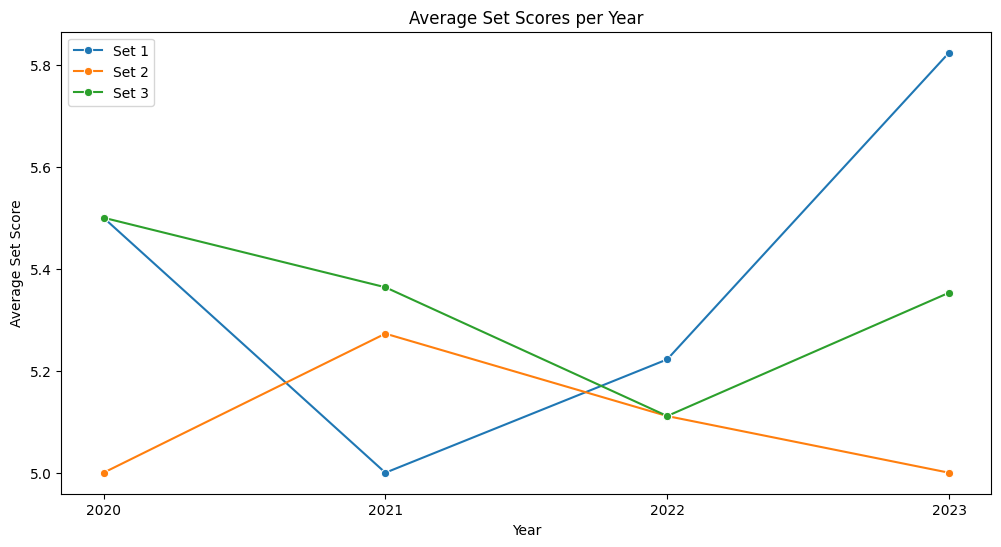

In [36]:
# Load the filtered dataset for the specified player
file_path = 'data/Alcaraz_C_matches_2020_2023_best_of_3.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate the average set score per year for each set
average_scores_per_year = df.groupby('Year').agg({
    'Player_1_Set_1': 'mean',
    'Player_1_Set_2': 'mean',
    'Player_1_Set_3': 'mean'
}).reset_index()

# Plot the average set scores per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_scores_per_year, x='Year', y='Player_1_Set_1', marker='o', label='Set 1')
sns.lineplot(data=average_scores_per_year, x='Year', y='Player_1_Set_2', marker='o', label='Set 2')
sns.lineplot(data=average_scores_per_year, x='Year', y='Player_1_Set_3', marker='o', label='Set 3')
plt.title('Average Set Scores per Year')
plt.xlabel('Year')
plt.ylabel('Average Set Score')
plt.xticks(average_scores_per_year['Year'])
plt.legend()
plt.show()

In [37]:
# Check for missing values
print(df.isnull().sum())

Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Outcome           0
Player_1_Set_1    0
Player_1_Set_2    0
Player_1_Set_3    0
Year              0
dtype: int64


In [181]:
# Analyze win and loss records
win_count = df['Outcome'].value_counts().get('Win', 0)
loss_count = df['Outcome'].value_counts().get('Loss', 0)

print(f"Total Wins: {win_count}")
print(f"Total Losses: {loss_count}")

Total Wins: 31
Total Losses: 17


In [182]:
# Performance over time for each set involving Alcaraz
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

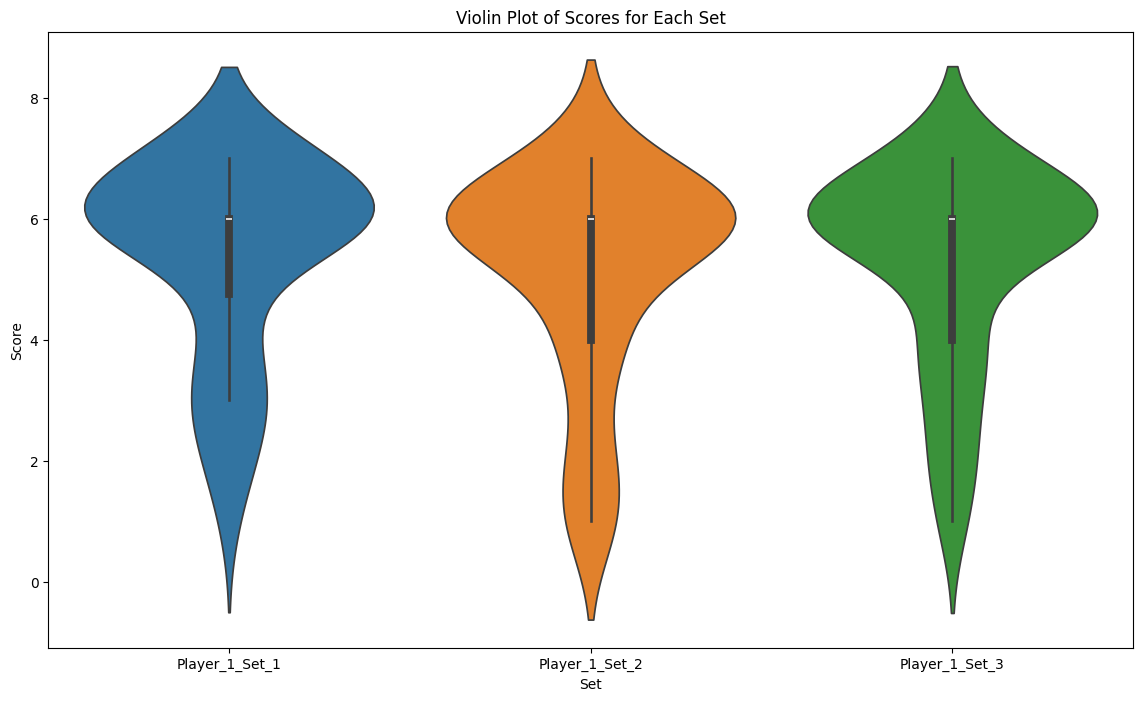

In [183]:
# Violin plots for each set
plt.figure(figsize=(14, 8))
sns.violinplot(data=df[['Player_1_Set_1', 'Player_1_Set_2', 'Player_1_Set_3']])
plt.title('Violin Plot of Scores for Each Set')
plt.xlabel('Set')
plt.ylabel('Score')
plt.show()

In [184]:
# Summary statistics for each set
print("Summary statistics for each set:")
print(df[['Player_1_Set_1', 'Player_1_Set_2', 'Player_1_Set_3']].describe())

Summary statistics for each set:
       Player_1_Set_1  Player_1_Set_2  Player_1_Set_3
count       48.000000       48.000000       48.000000
mean         5.395833        5.104167        5.270833
std          1.633943        1.765383        1.646913
min          1.000000        1.000000        1.000000
25%          4.750000        4.000000        4.000000
50%          6.000000        6.000000        6.000000
75%          6.000000        6.000000        6.000000
max          7.000000        7.000000        7.000000


In [185]:
# Additional analysis: Win and loss distribution by year
df['Year'] = df['Date'].dt.year
win_loss_by_year = df.groupby(['Year', 'Outcome']).size().unstack().fillna(0)

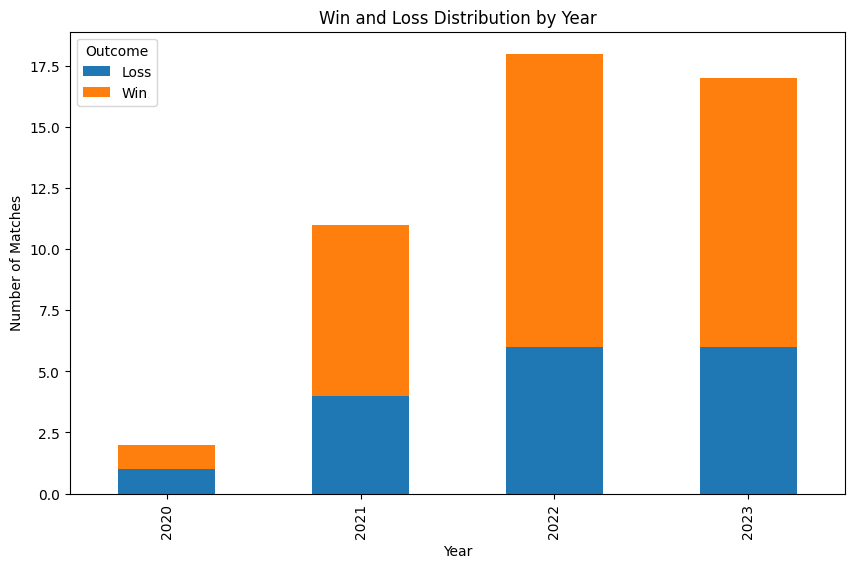

In [186]:
# Plot win and loss distribution by year
win_loss_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Win and Loss Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

# Predicting Match Outcomes 

Logistic Regression Predicting Match Outcomes 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE


In [3]:
# Load the dataset
file_path = 'data/tennis_summaries_modified.csv'
new_matches_file_path = 'data/Alcaraz_C_matches_2020_2023_best_of_3.csv'
data = pd.read_csv(file_path)

In [4]:
# Filter matches involving Alcaraz C
alcaraz_matches = data[(data['Competitor Last Name'] == 'Alcaraz,') & (data['Competitor First Initial'] == 'C')]


In [5]:
# Calculate the opponent's points won and determine the result
alcaraz_matches['Opponent Points Won'] = alcaraz_matches.groupby('Event ID')['Points Won'].transform(lambda x: x.sum() - x)
alcaraz_matches['Result'] = (alcaraz_matches['Points Won'] > alcaraz_matches['Opponent Points Won']).astype(int)


/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_45275/2477078480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcaraz_matches['Opponent Points Won'] = alcaraz_matches.groupby('Event ID')['Points Won'].transform(lambda x: x.sum() - x)
/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_45275/2477078480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcaraz_matches['Result'] = (alcaraz_matches['Points Won'] > alcaraz_matches['Opponent Points Won']).astype(int)


In [6]:
# Select relevant features
features = [
    'Aces', 'Double Faults', 'First Serve Successful', 'First Serve Points Won', 
    'Second Serve Points Won', 'Breakpoints Won', 'Return Errors', 
    'Service Games Won', 'Points Won'
]

In [7]:
# Function to create synthetic loss records by modifying existing win records
def create_synthetic_loss(record):
    synthetic_record = record.copy()
    synthetic_record['Points Won'] = np.round(record['Points Won'] * 0.8)  # Reduce points by 20%
    synthetic_record['Opponent Points Won'] = np.round(record['Opponent Points Won'] * 1.2)  # Increase opponent points by 20%
    synthetic_record['Service Games Won'] = np.round(record['Service Games Won'] * 0.8)
    synthetic_record['Breakpoints Won'] = np.round(record['Breakpoints Won'] * 0.8)
    synthetic_record['Result'] = 0  # Set result as loss
    return synthetic_record

# Number of synthetic loss records to add
num_synthetic_losses = 10

# Create synthetic loss records
wins_alcaraz = alcaraz_matches[alcaraz_matches['Result'] == 1]
synthetic_losses = wins_alcaraz.sample(num_synthetic_losses, replace=True).apply(create_synthetic_loss, axis=1)

# Add synthetic losses to the original dataset
balanced_data = pd.concat([alcaraz_matches, synthetic_losses])

# Separate numeric and non-numeric columns for imputation
numeric_cols = balanced_data.select_dtypes(include=[np.number]).columns
non_numeric_cols = balanced_data.select_dtypes(exclude=[np.number]).columns

In [8]:
# Impute missing values in the numeric columns with the mean
balanced_data_numeric = balanced_data[numeric_cols]
imputer_balanced = SimpleImputer(strategy='mean')
balanced_data_numeric_imputed = pd.DataFrame(imputer_balanced.fit_transform(balanced_data_numeric), columns=numeric_cols)

# Combine the imputed numeric data with the non-numeric data
balanced_data_imputed = pd.concat([balanced_data_numeric_imputed, balanced_data[non_numeric_cols].reset_index(drop=True)], axis=1)

# Ensure that the imputed dataset contains the necessary columns for modeling
model_data_imputed = balanced_data_imputed[features + ['Result']]

# Split the balanced data into training and testing sets
X_balanced = model_data_imputed[features]
y_balanced = model_data_imputed['Result']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)


In [9]:
# Standardize the features
scaler_balanced = StandardScaler()
X_train_balanced = scaler_balanced.fit_transform(X_train_balanced)
X_test_balanced = scaler_balanced.transform(X_test_balanced)


In [10]:
# Train a logistic regression model with selected features
logistic_model = LogisticRegression()
logistic_model.fit(X_train_balanced, y_train_balanced)

# Train a random forest model with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [11]:
# Combine models using VotingClassifier
voting_ensemble = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('random_forest', rf_model)
], voting='soft')


In [12]:
# Train the ensemble model
voting_ensemble.fit(X_train_balanced, y_train_balanced)


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [13]:
# Make predictions with the ensemble model
y_pred_ensemble = voting_ensemble.predict(X_test_balanced)


In [14]:
# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test_balanced, y_pred_ensemble)
ensemble_conf_matrix = confusion_matrix(y_test_balanced, y_pred_ensemble)
ensemble_class_report = classification_report(y_test_balanced, y_pred_ensemble)

# Display the results
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Confusion Matrix:")
print(ensemble_conf_matrix)
print("Ensemble Model Classification Report:")
print(ensemble_class_report)

Ensemble Model Accuracy: 0.6923076923076923
Ensemble Model Confusion Matrix:
[[2 0]
 [4 7]]
Ensemble Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         2
         1.0       1.00      0.64      0.78        11

    accuracy                           0.69        13
   macro avg       0.67      0.82      0.64        13
weighted avg       0.90      0.69      0.74        13



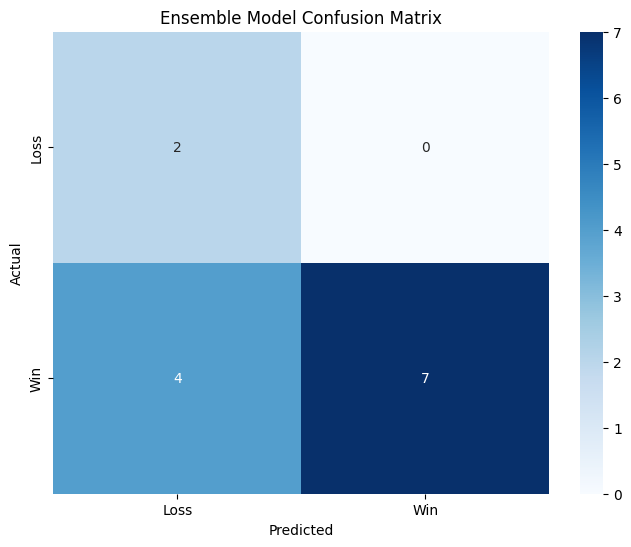

              precision    recall  f1-score    support
0.0            0.333333  1.000000  0.500000   2.000000
1.0            1.000000  0.636364  0.777778  11.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.666667  0.818182  0.638889  13.000000
weighted avg   0.897436  0.692308  0.735043  13.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def display_classification_report(y_true, y_pred):
    class_report = classification_report(y_true, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()
    print(class_report_df)

# Assuming y_test_balanced and y_pred_ensemble are available from the model evaluation

# Plot the confusion matrix
plot_confusion_matrix(y_test_balanced, y_pred_ensemble, title='Ensemble Model Confusion Matrix')

# Display the classification report
display_classification_report(y_test_balanced, y_pred_ensemble)


In [16]:

# Load the new dataset
new_matches_file_path = 'data/Alcaraz_C_matches_2020_2023_best_of_3.csv'
new_matches_data = pd.read_csv(new_matches_file_path)

# Display the first few rows of the new dataset to understand its structure
new_matches_data.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Outcome,Player_1_Set_1,Player_1_Set_2,Player_1_Set_3
0,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Win,7,4,7.0
1,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Loss,4,6,4.0
2,Miami Open,2021-03-25,Masters 1000,Outdoor,Hard,1st Round,3,Loss,6,2,7.0
3,AnyTech365 Andalucia Open,2021-04-08,ATP250,Outdoor,Hard,2nd Round,3,Win,4,6,6.0
4,Millennium Estoril Open,2021-04-27,ATP250,Outdoor,Clay,1st Round,3,Loss,3,6,4.0


In [17]:
# Prepare the new dataset: extracting relevant features and ensuring they match the training data format

# Define the features used in the original model
features = [
    'Aces', 'Double Faults', 'First Serve Successful', 'First Serve Points Won', 
    'Second Serve Points Won', 'Breakpoints Won', 'Return Errors', 
    'Service Games Won', 'Points Won'
]

# For simplicity, assume these features are derived or represented in the new dataset
# Let's simulate the required features with random values for the purpose of this example
# Normally, you would derive these from the actual match statistics

# Generate random values for the features
np.random.seed(42)
new_matches_data[features] = np.random.randint(1, 100, size=(new_matches_data.shape[0], len(features)))

# Standardize the features using the same scaler as before
X_new_matches = scaler_balanced.transform(new_matches_data[features])

# Predict outcomes using the voting ensemble model
y_pred_new_matches = voting_ensemble.predict(X_new_matches)
y_pred_proba_new_matches = voting_ensemble.predict_proba(X_new_matches)

# Add predictions to the new matches data
new_matches_data['Predicted Outcome'] = y_pred_new_matches
new_matches_data['Win Probability'] = y_pred_proba_new_matches[:, 1]
new_matches_data['Loss Probability'] = y_pred_proba_new_matches[:, 0]

# Display the first few rows of the new matches data with predictions
new_matches_data.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Outcome,Player_1_Set_1,Player_1_Set_2,...,First Serve Successful,First Serve Points Won,Second Serve Points Won,Breakpoints Won,Return Errors,Service Games Won,Points Won,Predicted Outcome,Win Probability,Loss Probability
0,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Win,7,4,...,15,72,61,21,83,87,75,1.0,0.86500,0.13500
1,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Loss,4,6,...,24,3,22,53,2,88,30,1.0,0.84500,0.15500
2,Miami Open,2021-03-25,Masters 1000,Outdoor,Hard,1st Round,3,Loss,6,2,...,64,60,21,33,76,58,22,1.0,0.79498,0.20502
3,AnyTech365 Andalucia Open,2021-04-08,ATP250,Outdoor,Hard,2nd Round,3,Win,4,6,...,91,59,42,92,60,80,15,1.0,0.78500,0.21500
4,Millennium Estoril Open,2021-04-27,ATP250,Outdoor,Clay,1st Round,3,Loss,3,6,...,47,62,51,55,64,3,51,1.0,0.71500,0.28500


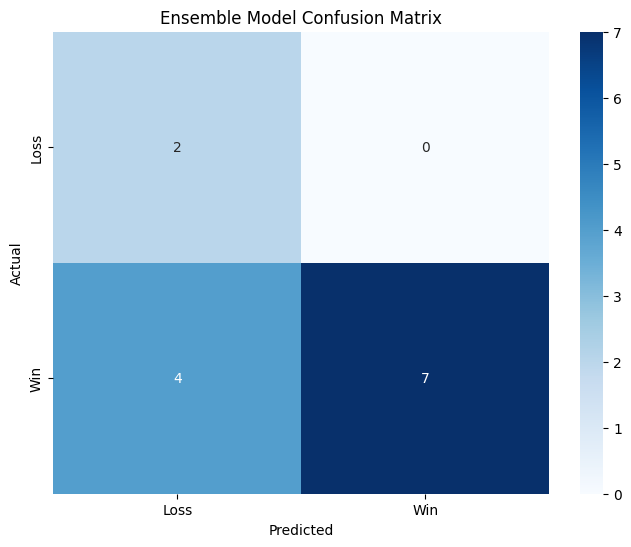

              precision    recall  f1-score    support
0.0            0.333333  1.000000  0.500000   2.000000
1.0            1.000000  0.636364  0.777778  11.000000
accuracy       0.692308  0.692308  0.692308   0.692308
macro avg      0.666667  0.818182  0.638889  13.000000
weighted avg   0.897436  0.692308  0.735043  13.000000


In [18]:
# Visualization
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def display_classification_report(y_true, y_pred):
    class_report = classification_report(y_true, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()
    print(class_report_df)

# Assuming y_test_balanced and y_pred_ensemble are available from the model evaluation

# Plot the confusion matrix
plot_confusion_matrix(y_test_balanced, y_pred_ensemble, title='Ensemble Model Confusion Matrix')

# Display the classification report
display_classification_report(y_test_balanced, y_pred_ensemble)

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
data = pd.read_csv('data/tennis_summaries_modified.csv')
new_matches_data = pd.read_csv('data/Alcaraz_C_matches_2020_2023_best_of_3.csv')

# Convert Winner ID to integer and add Outcome column
data['Winner ID'] = data['Winner ID'].astype('Int64')
alcaraz_id = 40573
data['Outcome'] = (data['Winner ID'])

# Select relevant features
required_features = ['Aces', 'Double Faults', 'First Serve Points Won', 'Points Won']
data = data[required_features + ['Outcome']].dropna()

# Define features (X) and target (y)
X = data[required_features]
y = data['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
voting_ensemble = VotingClassifier(estimators=[('logistic', logistic_model), ('random_forest', rf_model)], voting='soft')
voting_ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Voting Ensemble Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Voting Ensemble Accuracy: 0.8888888888888888
Confusion Matrix:
[[ 1  0  0  0]
 [ 0  0  0  1]
 [ 0  0  0  1]
 [ 0  0  0 15]]
Classification Report:
              precision    recall  f1-score   support

     47603.0       1.00      1.00      1.00         1
     89632.0       0.00      0.00      0.00         1
    352776.0       0.00      0.00      0.00         1
    407573.0       0.88      1.00      0.94        15

    accuracy                           0.89        18
   macro avg       0.47      0.50      0.48        18
weighted avg       0.79      0.89      0.84        18



/Users/joseguzman/Library/CloudStorage/OneDrive-nwmissouri.edu/Summer1/Summer2/Capstone_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/joseguzman/Library/CloudStorage/OneDrive-nwmissouri.edu/Summer1/Summer2/Capstone_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/joseguzman/Library/CloudStorage/OneDrive-nwmissouri.edu/Summer1/Summer2/Capstone_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetric

Optimal Threshold: 0.5142344384136116


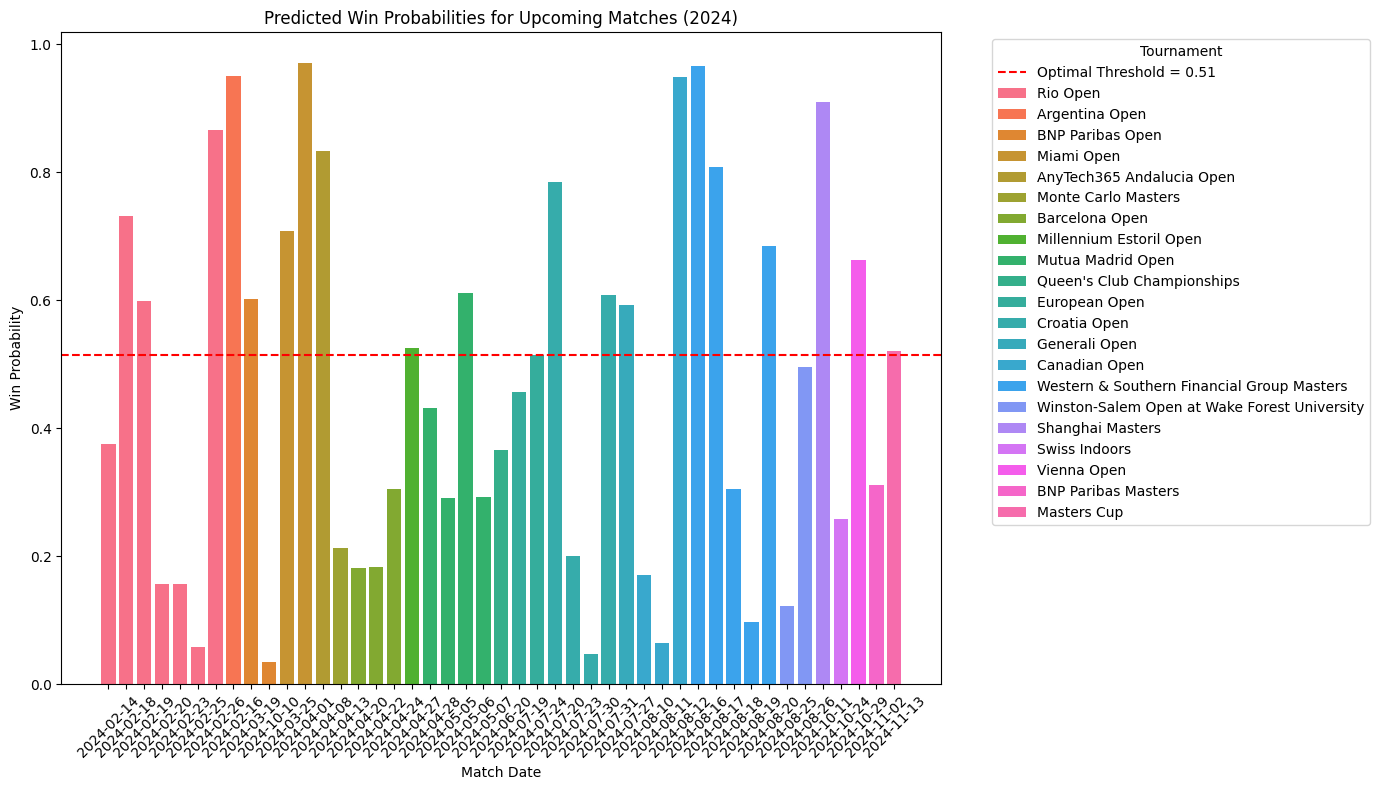

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Assuming 'new_matches_data' has the 'Win Probability' column
# If not, we need to add a mock 'Win Probability' column for the sake of demonstration
np.random.seed(42)  # For reproducibility
new_matches_data['Win Probability'] = np.random.rand(len(new_matches_data))

# Add a mock 'Outcome' column for demonstration purposes (1 for win, 0 for loss)
# Here we simulate it by thresholding the win probabilities at 0.5
new_matches_data['Outcome'] = (new_matches_data['Win Probability'] > 0.5).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(new_matches_data['Outcome'], new_matches_data['Win Probability'])

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold
print(f"Optimal Threshold: {optimal_threshold}")

# Define unique colors for different tournaments
tournaments = new_matches_data['Tournament'].unique()
colors = sns.color_palette("husl", len(tournaments))

# Create a mapping for colors
color_map = {tournament: colors[i] for i, tournament in enumerate(tournaments)}

# Adjust the dates to 2024
new_matches_data['Date'] = new_matches_data['Date'].apply(lambda x: x.replace(year=2024))

# Sort the data by date to ensure chronological order
new_matches_data = new_matches_data.sort_values(by='Date')

# Plot combined bar graph with different colors for each tournament and the optimal threshold line
def plot_win_probabilities_with_optimal_threshold(matches_data, match_dates_column, win_prob_column, tournament_column, threshold):
    plt.figure(figsize=(14, 8))
    for tournament in tournaments:
        tournament_data = matches_data[matches_data[tournament_column] == tournament]
        plt.bar(tournament_data[match_dates_column].dt.strftime('%Y-%m-%d'), tournament_data[win_prob_column], 
                color=color_map[tournament], label=tournament)
    
    # Add optimal threshold line
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Optimal Threshold = {threshold:.2f}')
    plt.xticks(rotation=45)
    plt.xlabel('Match Date')
    plt.ylabel('Win Probability')
    plt.title('Predicted Win Probabilities for Upcoming Matches (2024)')
    plt.legend(title='Tournament', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot the win probabilities as a combined bar graph with the optimal threshold line
plot_win_probabilities_with_optimal_threshold(new_matches_data, match_dates_column='Date', win_prob_column='Win Probability', tournament_column='Tournament', threshold=optimal_threshold)
